## MACHINE LEARNING DESCOMPLICADO
Autor: Mauro Saito

In [1]:
### Importação dos pacotes
import pandas as pd
import os
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

### Piada

Quanto é 2 + 2?  

Um matemático: 4 com certeza. 

Um físico: depende, estamos falando de soma vetorial, tensorial, relatividade, soma escalar? 

Um engenheiro: bota 5 que aguenta. 

Um estatístico: algo entre 3,99...9 e 4,00...01 

### INTRODUÇÃO

Nesse pequeno manual, será feita uma breve explicação de aplicação de Machine Learning, com ênfase nos conceitos de ML (e nem tanto de estatística) e evitando códigos de programação complicada (portanto, não será detalhado o funcionamento do código mas estão disponilizados para serem executados normalmente).  
Os scripts usados estarão em Python e a ferramenta de datamining, open-source,  é o Orange Data Mining*.  

*Orange is a component-based visual programming software package for data visualization, machine learning, data mining, and data analysis.(https://orange.biolab.si)

Para facilitar o entendimento, nesse tutorial de nível básico será usado um dataset de APENAS 10 LINHAS!!! (registros).  
O objetivo principal é desmistificar e fugir da abstração do Machine Learning.

Os conceitos a serem aplicados são basicamente os mesmos que são usados para um dataset de 10 milhões de registros.

## Exercício 1
Nesse exercício serão vistos:
- Noções introdutórias de ML;
- Regressão linear simples;
- Datasets de treino e de teste.

Vamos supor que temos um experimento em que medimos a grandeza y em função de uma variável x e obtivéssemos os valores abaixo.

In [2]:
x = [0, 1, 2, 3]
y_medido = [0, 2, 4, 6]

In [3]:
d = {'x': x, 'y_medido': y_medido}
df = pd.DataFrame(data=d)
df

,x,y_medido
0,0,0
1,1,2
2,2,4
3,3,6


Qual o valor de 'y' se 'x' for igual 5?  
A resposta mais 'intuitiva' seria 10.

Ou seja, supõe-se que a equação de previsão seria y_estimado = 2x.  

E mais, o erro quadrático médio, MSE (que é uma das formas de se avaliar o quanto seu modelo está aderente), seria igual a zero(!), pois o valor de y estimado seria exatamente igual ao y medido.

In [4]:
y_estimativa1 = [0, 2, 4, 6]

d = {'x': x, 'y_medido': y_medido, 'y_estimativa1': y_estimativa1}
df = pd.DataFrame(data=d)
df['erro_quadratico'] = df['y_medido'] - df['y_estimativa1']

df

,x,y_medido,y_estimativa1,erro_quadratico
0,0,0,0,0
1,1,2,2,0
2,2,4,4,0
3,3,6,6,0


Graficamente,

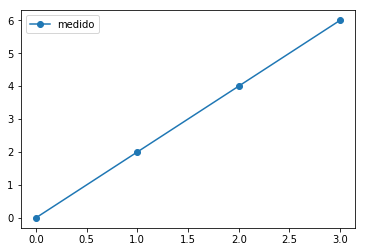

In [5]:
plt.plot(x, y_medido, 'o-', label='medido')
plt.legend()

Agora, vamos supor que temos os seguintes valores restantes:

In [6]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_medido = [0, 2, 4, 6, 10, 15, 18, 21, 24, 27]


In [7]:
d = {'x': x, 'y_medido': y_medido}
df = pd.DataFrame(data=d)
df

,x,y_medido
0,0,0
1,1,2
2,2,4
3,3,6
4,4,10
5,5,15
6,6,18
7,7,21
8,8,24
9,9,27


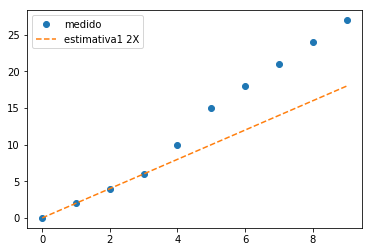

In [8]:
y_estimativa1 = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
plt.plot(x, y_medido, 'o', label='medido')
plt.plot(x, y_estimativa1, '--', label="estimativa1 2X")
plt.legend()
plt.show()

O valor 'chutado' (estimativa) de y, para x=5, com base na observação dos primeiros valores foi 10. 

Entretanto, no nosso experimento, o valor realmente medido foi 15.

Esse é um típico exemplo de 'overfitting'*, em que nosso modelo de previsão 'fitou' perfeitamente (nota-se que os quatro primeiros pontos estão sobre a suposta reta que nos dá a estimativa adequada) ao que chamamos de 'dataset de treino' mas não obteve o mesmo sucesso na estimativa (não é necessário o ajuste perfeito à reta para haver overtting).

**Sobre-ajuste ou sobreajuste (do inglês: overfitting) é um termo usado em estatística para descrever quando um modelo estatístico se ajusta muito bem ao conjunto de dados anteriormente observado, mas se mostra ineficaz para prever novos resultados.(fonte: wikipedia)*

Se, por outro lado, utilizássemos os 4 últimos valores de x, teríamos que a equação de previsão/estimação seria y = 3x e, novamente, também teríamos overfitting.

In [11]:
df.loc[:, ['x', 'y_medido']][3:10]

,x,y_medido
3,3,6
4,4,10
5,5,15
6,6,18
7,7,21
8,8,24
9,9,27


Se x=5, então y_estimativa=15... e y_medido=15 (ok!)  
Se x=3, então y_estimativa=9... mas y_medido=6 (nok!)

Retomando o dataset integral:

In [12]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_medido = [0, 2, 4, 6, 10, 15, 18, 21, 24, 27]
y_estimativa2 = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27]

d = {'x': x, 'y_medido': y_medido, 'y_estimativa2': y_estimativa2}
df = pd.DataFrame(data=d)
df

,x,y_medido,y_estimativa2
0,0,0,0
1,1,2,3
2,2,4,6
3,3,6,9
4,4,10,12
5,5,15,15
6,6,18,18
7,7,21,21
8,8,24,24
9,9,27,27


Representamos abaixo as duas retas de estimação acima:

In [13]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_medido = [0, 2, 4, 6, 10, 15, 18, 21, 24, 27]
y_estimativa1 = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
y_estimativa2 = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27]

In [14]:
d = {'x': x, 'y_medido': y_medido, 'y_estimativa1': y_estimativa1, 'y_estimativa2': y_estimativa2}
df = pd.DataFrame(data=d)

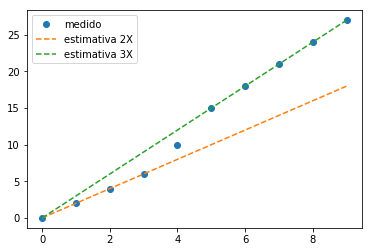

In [15]:
plt.plot(x, y_medido, 'o', label='medido')
plt.plot(x, y_estimativa1, '--', label="estimativa 2X")
plt.plot(x, y_estimativa2, '--', label="estimativa 3X")
plt.legend()
plt.show()


Temos então que, se fizermos a estimativa tanto a partir dos primeiros valores quanto a partir dos últimos valores do dataset, teremos overfitting e uma estimativa falha para o restante dos valores de x.  

Então, como resolvemos, ou melhor, minimizamos esse problema?

### TREINO e TESTE

Vimos acima que subdividimos o dataset em dois subsets: um de TREINO e outro de TESTE.

Em ML, em regra, necessitamos de um dataset de TREINO para efetuar a validação do modelo para, em seguida, fazer a avaliação com o dataset de TESTE. 

Scripts de programação e ferramentas de datamining utilizam diversas técnicas para separação desses datasets (resampling).

Em geral, aleatoriamente, separa-se 70% para o dataset de TREINO e os 30% restantes para o dataset de TESTE. Não existe regra definida. Depende sempre do problema que se propõe a resolver e nada impede de utilizar as relações 60% e 40%, 80% e 20% ou 50% e 50%.

No nosso exemplo, uma forma de evitar o overfitting é separar aleatoriamente (e não sequencialmente) os valores dos datasets de TREINO e de TESTE.

O script abaixo é um exemplo de separação do dataset.

In [16]:
X = pd.DataFrame(x, columns=['x'])

y = pd.DataFrame(y_medido, columns=['y_medido'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

Dataset de TREINO:

In [18]:
pd.concat([X_train, y_train], axis=1).sort_index()

,x,y_medido
0,0,0
2,2,4
3,3,6
5,5,15
6,6,18
7,7,21
8,8,24


Acima, temos que o script selecionou aleatoriamente 7 elementos (70%) para fazer o modelamento.  
Os 30% restante serão utilizados para fazer a avaliação do modelo.

Logo:  
Dataset de TESTE:

In [19]:
df_test = df.loc[X_test.index, ['x', 'y_medido']]
df_test['y_target']= '?'
df_test.sort_index()

,x,y_medido,y_target
1,1,2,?
4,4,10,?
9,9,27,?


Nosso objetivo é fazer a regressão linear e depois comparar a avaliação do modelo comparando o valor estimado (y_target) com o valor medido (y_medido).

In [20]:
from sklearn.linear_model import LinearRegression  ### Importação do pacote de Regressão
lm = LinearRegression() ### Alias da Regressão
lm.fit(X_train, y_train) ### ML é só essa linha!!! 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Agora que vamos executar o comando/script do ML propriamente dito (todas as etapas anteriores foram preparatórias!)

In [21]:
predictions = lm.predict(X_test)

In [31]:
df_test['previsoes'] = predictions
df_test.drop(['y_target'], axis=1, inplace=True)
df_test

,x,y_medido,previsoes
4,4,10,11.206897
9,9,27,27.126437
1,1,2,1.655172


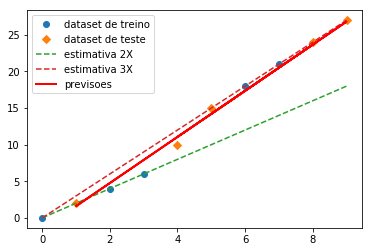

In [74]:
plt.plot(X_train, y_train, 'o', label='dataset de treino')
plt.plot(X_test, y_test, 'D', label='dataset de teste')

plt.plot(x, y_estimativa1, '--', label="estimativa 2X")
plt.plot(x, y_estimativa2, '--', label="estimativa 3X")
plt.plot(X_test, df_test['previsoes'], '-', label="previsoes", linewidth=2, color='red')
plt.legend()
plt.show()

#### Agora sim! Temos uma reta (em vermelho) que representa o menor desvio dos pontos medidos no nosso experimento.

In [53]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 0.5304972035055268


### Vamos, agora,  alterar o tamanho dos datasets de TREINO e TESTE para 50% e 50% para ver o que acontece.

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=102)

from sklearn.linear_model import LinearRegression  ### Importação do pacote de Regressão
lm = LinearRegression() ### Alias da Regressão
lm.fit(X_train, y_train) ### ML é só essa linha!!!

df_test = df.loc[X_test.index, ['x', 'y_medido']]
df_test.sort_index()

predictions = lm.predict(X_test)

df_test['previsoes'] = predictions
df_test

,x,y_medido,previsoes
4,4,10,11.060241
9,9,27,26.813253
1,1,2,1.608434
8,8,24,23.662651
5,5,15,14.210843


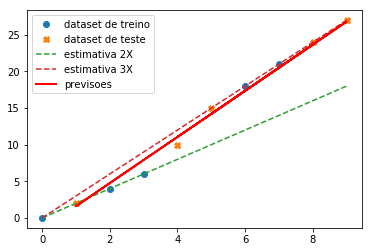

In [70]:
plt.plot(X_train, y_train, 'o', label='dataset de treino')
plt.plot(X_test, y_test, 'X', label='dataset de teste')

plt.plot(x, y_estimativa1, '--', label="estimativa 2X")
plt.plot(x, y_estimativa2, '--', label="estimativa 3X")
plt.plot(X_test, df_test['previsoes'], '-', label="previsoes", linewidth=2, color='red')
plt.legend()
plt.show()

## Esse foi um exercício de modelamento de regressão linear simples.  
A regressão linear múltipla segue basicamente os mesmos passos, com a diferença de que, ao invés de uma coluna (uma única variável). o modelo de regressão será feito a partir de várias váriaveis.


## Exercício 2
Nesse exercício serão vistos:
- Regressão logística múltipla;
- Variáveis categóricas e dummy;
- Matriz de confusão (Confusion Matrix).

Vamos, agora, praticar ML cuja variável-target seja categórica binária.  
Novamente, utilizaremos um mini-dataset de 10 registros.  
Essa é uma aplicação similar a detecção de fraudes bancárias.

In [101]:
atributo1 = [3, 4, 5, 0, 7, 8, 9, 1, 2, 6]
atributo2 = [6, 10, 15, 0, 21, 24, 27, 2, 4, 18]
atributo3 = ['B', 'A', 'A', 'B', 'C','A','B', 'A', 'B', 'A',]
fraude = [1, 0, 0, 0, 1, 0, 0, 0, 1, 0]

In [102]:
d = {'atrib1': atributo1, 'atrib2': atributo2, 'atrib3': atributo3, 'isFraud': fraude}
df_categorica = pd.DataFrame(data=d)
df_categorica

,atrib1,atrib2,atrib3,isFraud
0,3,6,B,1
1,4,10,A,0
2,5,15,A,0
3,0,0,B,0
4,7,21,C,1
5,8,24,A,0
6,9,27,B,0
7,1,2,A,0
8,2,4,B,1
9,6,18,A,0


Acima, o atributo 'atrib3' é uma variável categórica*.

_*Uma variável categórica é uma variável estatística, medida em uma escala nominal, cujas categorias identifiquem a sociedade da classe ou de grupo._ 

Uma vez que não há hierarquia (como ocorre por exemplo com escolaridade: níveis básico, ensino médio e suuperior) e, dado que para a modelagem do modelo de regressão faz-se que todas as variáveis sejam numéricas, vamos recorrer ao uso de variáveis dummy, que são variáveis binárias (0 ou 1) criadas para representar uma variável com duas ou mais categorias.  

No caso do nosso dataframe acima, o atributo 'atrib3' ficaria da seguinte forma:

In [103]:
dummy = pd.get_dummies(df_categorica['atrib3'])
dummy

,A,B,C
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1
5,1,0,0
6,0,1,0
7,1,0,0
8,0,1,0
9,1,0,0


Note que o primeiro registro é da categoria B, portanto, a dummy B criada tem valor '1' e, automaticamente, A e C assumirão valor '0'.  
Da mesma forma, se o registro é  categoria A, então a dummy A tem valor '1' e B e C terão valor '0'.  


Assim, o dataframe completo ficaria assim:

In [104]:
df_categorica_dummy = pd.concat([df_categorica, dummy], axis=1)
df_categorica_dummy = df_categorica_dummy.loc[:, ['atrib1', 'atrib2', 'A', 'B', 'C', 'isFraud']]
df_categorica_dummy.columns = ['atrib1', 'atrib2', 'atrib3_A', 'atrib3_B', 'atrib3_C', 'isFraud']
df_categorica_dummy 

,atrib1,atrib2,atrib3_A,atrib3_B,atrib3_C,isFraud
0,3,6,0,1,0,1
1,4,10,1,0,0,0
2,5,15,1,0,0,0
3,0,0,0,1,0,0
4,7,21,0,0,1,1
5,8,24,1,0,0,0
6,9,27,0,1,0,0
7,1,2,1,0,0,0
8,2,4,0,1,0,1
9,6,18,1,0,0,0


A variável-target será a coluna 'isFraud', em que o valor '1' representa fraude e '0' representa não-fraude.

Divisão do dataset em TREINO/TESTE (70% / 30%)

In [120]:
X = df_categorica_dummy.loc[:, ['atrib1', 'atrib2', 'atrib3_A', 'atrib3_B', 'atrib3_C']]
y = df_categorica_dummy.loc[:, 'isFraud']

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

### Dataset de TREINO

In [122]:
pd.concat([X_train, y_train], axis=1).sort_index()

,atrib1,atrib2,atrib3_A,atrib3_B,atrib3_C,isFraud
0,3,6,0,1,0,1
2,5,15,1,0,0,0
3,0,0,0,1,0,0
5,8,24,1,0,0,0
6,9,27,0,1,0,0
7,1,2,1,0,0,0
8,2,4,0,1,0,1


In [123]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\mauro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
predictions = logmodel.predict(X_test)

In [125]:
X_test['isFraud'] = y_test
X_test['previsoes'] = predictions

C:\Users\mauro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mauro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [365]:
### Função para comparar o valor previsto
### TP = verdadeiro-positivo
### TN = verdadeiro-negativo
### FP = falso-positivo
### FN = falso-negativo

def compara(a, b):
    if a == b:
        if a == 1:
            pred = 'TP'
        else:
            pred = 'TN'
    else:
        if a == 0:
            pred = 'FP'
        else:
            pred = 'FN'
    return(pred)

### Comparação entre o valor do registro e a previsão

In [128]:
X_test.loc[:,  ['isFraud', 'previsoes']].sort_index()

,isFraud,previsoes
1,0,0
4,1,0
9,0,0


Temos que houve 2 acertos, em que o valor observado é igual a '0' mas a previsão foi '0', ou seja, dois verdadeiros-negativos(TN).  
Entretanto, no registro 4, o valor observado é '1' mas o valor previsto foi '0', ou seja, temos um falso-negativo (FN).

Para a análise dos resultados, utilizamos a matriz de confusão (confusion matrix).  
Nela, confrontamos os valores observados com os valores previstos e fazemos um resumo dos verdadeiros-positivos (TP - True Positives), verdadeiros-negativos (TN - True Negatives), falsos-positivos (FP - False Positives) e falsos-negativos (FN - False Negatives).

In [129]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, predictions))

[[2 0]
 [1 0]]


### Vamos, agora,  alterar o tamanho dos datasets de TREINO e TESTE para 50% e 50% para ver o que acontece.

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=200)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
X_test['isFraud'] = y_test
X_test['previsoes'] = predictions

X_test.loc[:,  ['isFraud', 'previsoes']].sort_index()

C:\Users\mauro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mauro\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\mauro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,isFraud,previsoes
1,0,0
3,0,1
5,0,0
6,0,1
8,1,1


#### Temos agora que dos 5 registros do dataset de teste, há:
- 1 verdadeiro-positivo (Registro 8)
- 2 verdadeiros-negativos (Registros 1 e 5)
- 2 falso-positivos (Registros 3 e 6)


### A matriz de confusão ficará assim:

In [142]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, predictions))

[[2 2]
 [0 1]]


## Exercício 3
Nesse exercício serão vistos:
- ML com Orange Data Mining;
- Regressão logística;
- Tratamento de valor NaN.

Vamos agora utilizar um dataset maior.  
Para isso, além do Python, vamos utilizar o Orange Data Mining para subsidiar as análises e fazer a comparação entre os resultados das duas ferramentas.

In [145]:
### Caminho dos Datasets

DATASET_PATH_TRAIN = "C:/Users/mauro/Downloads/train_transaction.csv"
DATASET_PATH_TEST = "C:/Users/mauro/Downloads/test_transaction.csv"

In [146]:
df_treino = pd.read_csv(DATASET_PATH_TRAIN)

In [147]:
df_treino.shape

(590540, 394)

O dataset tem 590.540 linhas e 394 colunas.

In [148]:
df_treino.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para efeito didático, por enquanto, vamos aplicar Machine Learning para um 'pedacinho' do dataset acima (posteriormente, faremos um exercício com dataset completo).  

Arbitrariamente, seleciono as colunas 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4' e 'card5'.  
Para a variável independente, temos a coluna 'isFraud', ou seja, precisamos determinar quando a operação é fraudulenta ou não.    

Faremos a nossa análise supondo que só tivéssemos as 50 primeiras linhas.

In [286]:
df_treino_mini = df_treino.loc[ :,  ['isFraud', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5']][1050:1100]
df_treino_mini

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5
1050,0,1134.700,W,2803,100.0,150.0,visa,226.0
1051,0,524.000,W,7919,194.0,150.0,mastercard,202.0
1052,0,73.970,W,7919,194.0,150.0,mastercard,202.0
1053,0,21.950,W,7919,194.0,150.0,mastercard,202.0
1054,0,219.990,W,7919,194.0,150.0,mastercard,202.0
1055,0,411.950,W,7919,194.0,150.0,mastercard,202.0
1056,0,200.000,W,7919,194.0,150.0,mastercard,202.0
1057,0,117.000,W,14426,111.0,150.0,mastercard,224.0
1058,0,44.500,W,7919,194.0,150.0,mastercard,202.0
1059,0,600.000,W,9323,111.0,150.0,visa,226.0


In [287]:
df_treino_mini.shape

(50, 8)

Temos, então, um dataset com 50 linhas e 8 colunas.

### Contagem de valores NaN

In [288]:
df_treino_mini.isnull().sum()

isFraud           0
TransactionAmt    0
ProductCD         0
card1             0
card2             1
card3             0
card4             0
card5             0
dtype: int64

Uma das etapas do ML é o tratamento dos valores NaN*.
No nosso dataset, temos o primeiro registro da coluna 'card2'.  

Há várias estratégias de substituição desses valores.  
Dentre elas: eliminar as linhas com valores NaN (o que acarretará na diminuição do tamanho do dataset), substituir os valores, por exemplo, pela média ou mediana ou inserir valores zero (veja bem, valor zero não é o mesmo que valor NaN).

_*Em computação, NaN é um valor ou símbolo usado nas linguagens de programação para representar um valor numérico indefinido ou irrepresentável._

#### Verificação do registro em que 'card2' tem valor NaN

In [289]:
df_treino_mini[df_treino_mini['card2'].isnull()]

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5
1067,0,250.0,W,2781,NaN,150.0,visa,166.0


In [290]:
### Gravando o valor do index do valor NaN
ind_nan = df_treino_mini[df_treino_mini['card2'].isnull()].index
ind_nan

Int64Index([1067], dtype='int64')

#### Média da coluna 'card2'

In [291]:
media_card2 = df_treino_mini['card2'].mean()
media_card2

249.3265306122449

In [292]:
#### Substituição do valor NaN pela média da Coluna 'card2'

In [293]:
media_card2

249.3265306122449

In [294]:
df_treino_mini.at[ind_nan, 'card2'] = media_card2

In [ ]:
### Conferindo se o valor NaN da coluna 'card2' foi substituído

In [310]:
df_treino_mini.loc[ind_nan, :]

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5
1067,0,250.0,W,2781,249.326531,150.0,visa,166.0


## Variáveis Categóricas

Da mesma forma que no Exercício 2, vamos converter os atributos categóricos em variáveis dummy.  
Temos que as colunas de 'ProductCD' e 'card4' são variáveis categóricas.  

Então, temos (5 primeiras linhas após a conversão):

In [311]:
ProductCD_dummy = pd.get_dummies(df_treino_mini['ProductCD'])
ProductCD_dummy.head(5)

,C,H,W
1050,0,0,1
1051,0,0,1
1052,0,0,1
1053,0,0,1
1054,0,0,1


In [312]:
card4_dummy = pd.get_dummies(df_treino_mini['card4'])
card4_dummy.head(5)

,mastercard,visa
1050,0,1
1051,1,0
1052,1,0
1053,1,0
1054,1,0


In [313]:
ProductCD_dummy = pd.get_dummies(df_treino_mini['ProductCD'])
ProductCD_dummy.columns = ['ProductCD_C', 'ProductCD_H', 'ProductCD_W']

card4_dummy = pd.get_dummies(df_treino_mini['card4'])
card4_dummy.columns = ['card4_mastercard', 'card4_visa']

In [314]:
df_treino_mini_dummy = pd.concat([df_treino_mini, ProductCD_dummy, card4_dummy], axis=1)

In [315]:
df_treino_mini_dummy = df_treino_mini_dummy.loc[:, ['isFraud', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'ProductCD_C', 'ProductCD_H', 'ProductCD_W',
       'card4_mastercard', 'card4_visa']]
df_treino_mini_dummy.head(5)

,isFraud,TransactionAmt,card1,card2,card3,card5,ProductCD_C,ProductCD_H,ProductCD_W,card4_mastercard,card4_visa
1050,0,1134.70,2803,100.0,150.0,226.0,0,0,1,0,1
1051,0,524.00,7919,194.0,150.0,202.0,0,0,1,1,0
1052,0,73.97,7919,194.0,150.0,202.0,0,0,1,1,0
1053,0,21.95,7919,194.0,150.0,202.0,0,0,1,1,0
1054,0,219.99,7919,194.0,150.0,202.0,0,0,1,1,0


### Agora o dataset está preparado para aplicarmos a regressão logística.

### TREINO / TESTE

In [316]:
X = df_treino_mini_dummy.loc[:, ['TransactionAmt', 'card1', 'card2', 'card3', 'card5',
       'ProductCD_C', 'ProductCD_H', 'ProductCD_W', 'card4_mastercard', 'card4_visa']]
y = df_treino_mini_dummy.loc[:, ['isFraud']] ### Variável target

### Variáveis independentes (que servirão para a estimativa do valor-target)

In [317]:
X.head(5) ### 5 primeiras linhas

,TransactionAmt,card1,card2,card3,card5,ProductCD_C,ProductCD_H,ProductCD_W,card4_mastercard,card4_visa
1050,1134.70,2803,100.0,150.0,226.0,0,0,1,0,1
1051,524.00,7919,194.0,150.0,202.0,0,0,1,1,0
1052,73.97,7919,194.0,150.0,202.0,0,0,1,1,0
1053,21.95,7919,194.0,150.0,202.0,0,0,1,1,0
1054,219.99,7919,194.0,150.0,202.0,0,0,1,1,0


Variável-target (que é a que será estimada)

In [318]:
y.head(5) ### 5 primeiras linhas

,isFraud
1050,0
1051,0
1052,0
1053,0
1054,0


### Aplicando a função de 'sampling' para determinar o dataset de TREINO e de TESTE

In [357]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

### DATASET DE TREINO (variáveis explicativas)

In [358]:
X_train.sort_index()

,TransactionAmt,card1,card2,card3,card5,ProductCD_C,ProductCD_H,ProductCD_W,card4_mastercard,card4_visa
1050,1134.700,2803,100.000000,150.0,226.0,0,0,1,0,1
1052,73.970,7919,194.000000,150.0,202.0,0,0,1,1,0
1053,21.950,7919,194.000000,150.0,202.0,0,0,1,1,0
1054,219.990,7919,194.000000,150.0,202.0,0,0,1,1,0
1055,411.950,7919,194.000000,150.0,202.0,0,0,1,1,0
1056,200.000,7919,194.000000,150.0,202.0,0,0,1,1,0
1057,117.000,14426,111.000000,150.0,224.0,0,0,1,1,0
1058,44.500,7919,194.000000,150.0,202.0,0,0,1,1,0
1059,600.000,9323,111.000000,150.0,226.0,0,0,1,0,1
1061,53.970,7919,194.000000,150.0,202.0,0,0,1,1,0


### Tamanho do Dataset - número de linhas 

In [359]:
X_train.shape[0]

35

### DATASET DE TREINO (variável-target)

In [360]:
y_train.sort_index()

,isFraud
1050,0
1052,0
1053,0
1054,0
1055,0
1056,0
1057,0
1058,0
1059,0
1061,0


### APLICAÇÃO DA REGRESSÃO LOGÍSTICA

In [361]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\mauro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mauro\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Resultado das previsões

In [363]:
predictions = logmodel.predict(X_test)
X_test['isFraud'] = y_test
X_test['previsoes'] = predictions

X_test['resultado'] = X_test.apply(lambda x: compara(x["isFraud"], x["previsoes"]),axis=1)

X_test.loc[:,  ['isFraud', 'previsoes', 'resultado']].sort_index()

C:\Users\mauro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mauro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mauro\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,isFraud,previsoes,resultado
1051,0,0,TN
1060,0,0,TN
1063,0,0,TN
1069,1,1,TP
1070,0,0,TN
1071,0,0,TN
1073,0,0,TN
1074,0,0,TN
1076,0,0,TN
1079,0,0,TN


### Resumo dos resultados

In [324]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, predictions))

[[12  1]
 [ 1  1]]


12 TN - verdadeiros-positivos  
1 TP - verdadeiro-positivo  
1 FP - falso-positivo  
1 FN - falso-negativo

## Orange Data Mining

Para faciliar a visualização e entendimento, vamos aplicar todas as etapas do Exercício 2 utilizando o Orange Data Mining*. Na minha opinião, uma excelente ferramenta** para aprendizado e desenvolvimento de protótipos de modelos de ML.

_*Orange is an open-source data visualization, machine learning and data mining toolkit. It features a visual programming front-end for explorative data analysis and interactive data visualization._

** Como está a disponibilidade de ferramentas de mineração de dados (alternativas em software livre/gratuito e alternativas pagas)?    
A partir da intensificação recente de pesquisas na área de desenvolvimento de algoritmos, há uma grande oferta de ferramentas para mineração de dados em ambiente livre e gratuita, com código fonte aberto (General Public Licence), entre elas: Weka (Witten & Frank, 2000), Mahout (Ingersoll, 2009), Orange data mining (Demsar, Zupan, Leban, & Curk, 2004), Rapid Miner (Hofmann & Klinkenberg, 2013), Tanagra (Rakotomalala, 2005), Keel (Alcala-Fdez et al., 2011) etc.  
Em termos de aplicações proprietárias, existem várias soluções e algoritmos de data mining incorporadas em ferramentas de business intelligence, como por exemplo: Oracle (Tamayo, Berger, Campos, & Yarmus, 2005), Microsoft (Seidman, 2001), SAS (Fernandez, 2003), entre outras.  
Porém um dos principais desafios ainda consiste em identificar qual estratégia algorítmica melhor se adequa ao contexto, problema e questão.  
(fonte: https://revistas.ufpr.br/atoz/article/view/41340/25332)

### Abaixo, temos o modelamento do nosso exercício.

O objetivo, por enquanto, não é ensinar o funcionamento da ferramenta mas dar um 'overview' das suas funcionalidades e comparar com o Python.

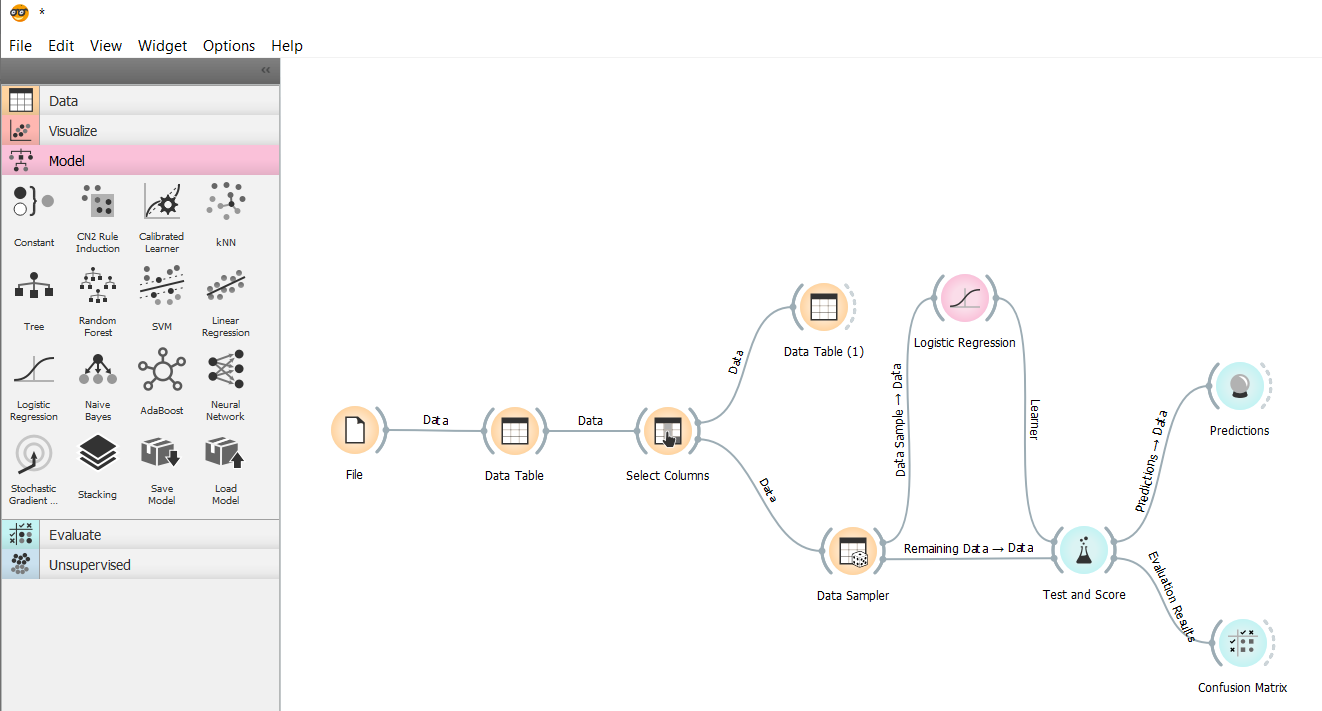

In [945]:
from IPython.display import Image
Image("C:/Users/mauro/Downloads/python001_orange.png")